<a href="https://colab.research.google.com/github/Gibbons-Lab/2021_data_literacy/blob/main/antibiotic_recovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Antiobiotic recovery

Here we will have a look at gut microbiome data from individuals that were put on antibiotics. Most of the individuals were sampled before antibiotic exposure (pre), during antibiotic exposure, and several weeks after exposure (post). The study included individuals from several countries. Here will look at the data from Singapore and Canada. 

To get an idea what the original data looked like, let's have a look at it. For that we will start by downloading the excel file for the study.



In [56]:
!wget https://git.io/JuaSY -O antibiotics.xlsx

--2021-09-10 23:06:15--  https://git.io/JuaSY
Resolving git.io (git.io)... 54.157.58.70, 18.205.36.100, 54.162.128.250, ...
Connecting to git.io (git.io)|54.157.58.70|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Gibbons-Lab/2021_data_literacy/raw/main/antibiotics_recovery/antibiotics.xlsx [following]
--2021-09-10 23:06:15--  https://github.com/Gibbons-Lab/2021_data_literacy/raw/main/antibiotics_recovery/antibiotics.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Gibbons-Lab/2021_data_literacy/main/antibiotics_recovery/antibiotics.xlsx [following]
--2021-09-10 23:06:15--  https://raw.githubusercontent.com/Gibbons-Lab/2021_data_literacy/main/antibiotics_recovery/antibiotics.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.19

This will us an excel file with several tables. You can have a look at the file by clicking on the folder symbol to the left. 

## The Singapore Data

For now we will load the original data for Singapore from the study. We will use the `pandas` library which has a lot of functions to read data from tabular data. Let's have a look at the first five rows afterwards.

In [81]:
import pandas as pd

singapore = pd.read_excel("antibiotics.xlsx", "Singapore")
singapore.head()

,ID,sample_id,stage,Status,Abiotrophia_defectiva,Acidaminococcus_fermentans,Acidovorax_unclassified,Acinetobacter_baumannii,Acinetobacter_junii,Acinetobacter_lwoffii,Acinetobacter_unclassified,Actinobacillus_minor,Actinomyces_odontolyticus,Actinomyces_oris,Actinomyces_urogenitalis,Actinomyces_viscosus,Aeromonas_unclassified,Aggregatibacter_aphrophilus,Aggregatibacter_segnis,Aggregatibacter_unclassified,Akkermansia_muciniphila,Alistipes_putredinis,Alistipes_shahii,Alistipes_unclassified,Alkaliphilus_unclassified,Anaerococcus_hydrogenalis,Anaerococcus_lactolyticus,Anaerococcus_unclassified,Anaerococcus_vaginalis,Anaerofustis_stercorihominis,Anaerostipes_caccae,Anaerotruncus_colihominis,Atopobium_parvulum,Atopobium_rimae,Atopobium_vaginae,Bacillus_subtilis,Bacteroides_caccae,Bacteroides_cellulosilyticus,Bacteroides_coprocola,Bacteroides_coprophilus,...,Slackia_exigua,Slackia_unclassified,Solobacterium_moorei,Staphylococcus_aureus,Staphylococcus_epidermidis,Staphylococcus_haemolyticus,Staphylococcus_lugdunensis,Stenotrophomonas_maltophilia,Streptococcus_agalactiae,Streptococcus_anginosus,Streptococcus_australis,Streptococcus_bovis,Streptococcus_cristatus,Streptococcus_equinus,Streptococcus_gallolyticus,Streptococcus_gordonii,Streptococcus_infantarius,Streptococcus_infantis,Streptococcus_mitis,Streptococcus_mutans,Streptococcus_oralis,Streptococcus_parasanguinis,Streptococcus_peroris,Streptococcus_pyogenes,Streptococcus_salivarius,Streptococcus_sanguinis,Streptococcus_thermophilus,Streptococcus_vestibularis,Subdoligranulum_variabile,Succinatimonas_hippei,Sutterella_wadsworthensis,Turicibacter_unclassified,Veillonella_atypica,Veillonella_dispar,Veillonella_parvula,Veillonella_unclassified,Vibrio_furnissii,Victivallis_vadensis,Weissella_paramesenteroides,Yersinia_unclassified
0,135EA_MBS303_A_INITIAL,135EA,pre,R,0.00000,0.0,0,0.0,0,0,0.0,0,0.00909,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0,0.00000,0.538870,0.007010,0.000000,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.03221,0.000000,0.0,0,0.0,2.717680,0.02634,0.17792,0.167290,...,0.0,0.00162,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.08000,0.0,0.0000,0.196650,0.000000,0.003700,0.000760,0.0,0.0,0.00000,0.0,0.00000,0.000870,0.000000,0.001960,0,0.0,0.0,0
1,135EA_MBS304_B_CLOSING,135EA,during,R,0.00000,0.0,0,0.0,0,0,0.0,0,0.00121,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0,0.00000,0.070640,0.002700,0.005510,0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.01563,0.000000,0.0,0,0.0,1.242320,0.06301,0.00000,0.433090,...,0.0,0.00000,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.09691,0.0,0.0000,0.216810,0.000000,0.005820,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.010320,0.000000,0.050930,0,0.0,0.0,0
2,135EA_MBS074_C_POST,135EA,post,R,0.00558,0.0,0,0.0,0,0,0.0,0,0.05306,0.006373,0.0,0.013097,0,0.000833,0.000193,0.0,0.02622,0.617983,0.067633,0.016133,0,0.0,0.0,0.0,0.0,0.00000,0.020023,1.26171,0.004943,0.0,0,0.0,2.604283,0.61807,0.00000,0.925543,...,0.0,0.03247,0.002063,0.0,0.0,0,0.0,0.0,0.0,0.0000,0.01015,0.0,0.0,0.00006,0.0,0.005637,0.116653,0.00141,0.01021,0.0,0.0,0.33372,0.0,0.0000,0.276893,0.001873,0.010157,0.022627,0.0,0.0,0.00395,0.0,0.00078,0.001027,0.002133,0.015363,0,0.0,0.0,0
3,148JV_MBS088_A_INITIAL,148JV,pre,R,0.00000,0.0,0,0.0,0,0,0.0,0,0.01533,0.096490,0.0,0.228200,0,0.000000,0.000000,0.0,0.01148,20.646710,1.694080,0.000000,0,0.0,0.0,0.0,0.0,0.04609,0.163570,7.03122,0.150540,0.0,0,0.0,1.924190,0.00000,0.00017,0.000000,...,0.0,0.01380,0.000000,0.0,0.0,0,0.0,0.0,0.0,1.2852,0.00000,0.0,0.0,0.00000,0.0,0.016720,0.000000,0.00000,0.00000,0.0,0.0,0.78052,0.0,0.0322,0.092850,0.014520,0.006440,0.015800,0.0,0.0,0.01225,0.0,0.00000,0.000000,0.023580,0.006610,0,0.0,0.0,0
4,148JV_MBS092_B_CLOSING,148JV,during,R,0.00000,0.0,0,0.0,0,0,0.0,0,0.00000,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0,0.00511,1.910700,0.975340,0.138840,0,0.0,0.0,0.0,0.0,0.00372,0.008100,0.20017,0.000000,0.0,0

As you can see there is data for 329 bacterial species and each value in the table is a percentage (so 1 means the bacteria contributed 1% of all DNA in the sample). To get an idea how that looks, let's have a look at one of the most abundant bacteria *Bacteroides vulgatus*. For that we use `seaborn` again, in particular the `stripplot` function that draws a dot for each data point and also jitters the data arund the x-axis a bit so we don't have that many overlapping points.

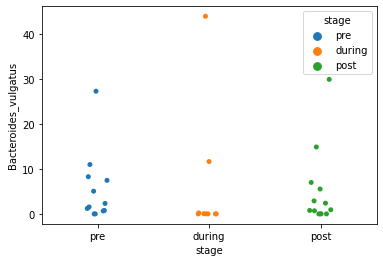

In [75]:
import seaborn as sns

sns.stripplot(x="stage", y="Bacteroides_vulgatus", hue="stage", data=singapore)

So we see that the bacteria is present in most individuals before antibiotics, gets eradicated in most individuals during antibiotics and pop back up after. But how about the entire ecosystem?

## Alpha Diversity

Alpha diversity is measure how diverse an ecosystem is, it takes the number of species but also the abundances into account and will give you a single positive number where higher values mean more diverse and lower values mean less diverse. So let's have a look at alpha diversity in data from Singapore and Canada. Here individuals were also classified into "recoverers" (R) and "non-recovereres" (NR).

In [57]:
import pandas as pd

adiv = pd.read_excel("antibiotics.xlsx", "Alpha Diversity (long)")
adiv

,stage,sample_id,Status,country,diversity
0,pre,135EA,R,Singapore,1.237418
1,during,135EA,R,Singapore,1.528318
2,post,135EA,R,Singapore,3.176266
3,pre,148JV,R,Singapore,3.076906
4,during,148JV,R,Singapore,2.220140
...,...,...,...,...,...
74,during,P4,NR,Canada,0.899459
75,post,P4,NR,Canada,1.537152
76,pre,P5,NR,Canada,1.972920
77,during,P5,NR,Canada,1.652205


So you see there is a single value for each measurement now. We will visualize this with the `relplot` function from `seaborn` using a line plot. This will draw a line for the mean value and shaded areas for the standard deviation.

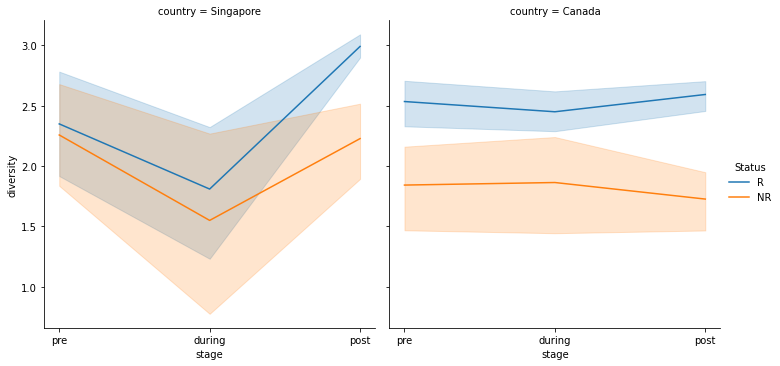

In [68]:
import seaborn as sns

sns.relplot(x="stage", y="diversity", hue="Status", kind="line", col="country", data=adiv)

So we the same behavior for Singapore again. Most people start at decent gut microbial diversity, then dip during antibiotic treatment and recover after. However you see that the "recoverers" end up at a higher diversity then the non-recoverers. This is similar in the Canadian population but the recoverers also tend to have a more diverse microbiome before the antibiotic treatment.

The one thing that is similar between the two countries are the differences after antibiotics. This becomes super clear if we only visualize the post-antibiotics samples.

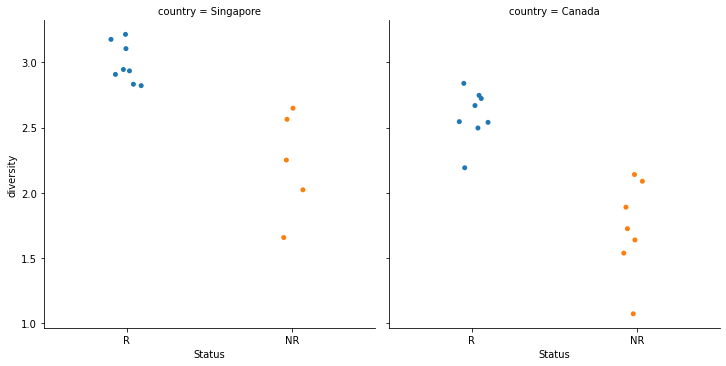

In [72]:
sns.catplot(x="Status", y="diversity", data=adiv[adiv.stage == "post"], col="country")

## Keystone taxa

So what could be driving those differences? Well let's have a look at the abundances of two species of interest. What we can ask is if those species are maybe more abundant in recoverers than non-recoverers. If that were true we might postulate that those bacteria help us to recover after antibiotics. 

Let's start with *Bifidobacterium adolescentis* which is in general pretty low abundance (~0.5% of bacteria in our gut). 

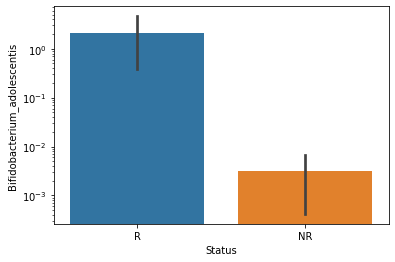

In [78]:
keystone = pd.read_excel("https://git.io/JuaSY", "Keystone Taxa Singapore")

sns.barplot(x="Status", y="Bifidobacterium_adolescentis", data=keystone, log=True)

Okay that looks like a difference for sure. The bars denote the average abundance and the lines the standard error. Let's also have a look at another species, *Bacteroides thetaiotaomicron*. 

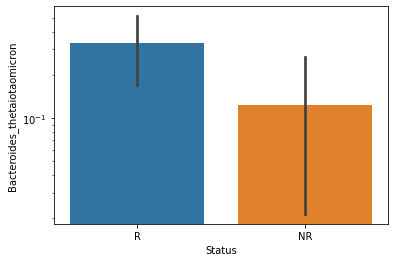

In [79]:
sns.barplot(x="Status", y="Bacteroides_thetaiotaomicron", data=keystone, log=True)

Similar behavior but a bit more noisy.